In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def clean_data(dataframe, renda, dict_renda=None):
    new_dataframe = pd.DataFrame(columns=['ano', 'idade'])
    new_dataframe['ano'] = dataframe['nu_ano']
    new_dataframe['idade'] = dataframe['nu_idade']
    
    if dict_renda is None:
        dict_renda = { 'a': 1.5, 'b': 2.25, 'c': 3.75, 'd': 5.25, 'e': 8.0, 'f': 15.0, 'g': 30.0 }
    
    r = dataframe[renda].str.lower()
    
    new_dataframe['renda'] = r.map(dict_renda)
    # new_dataframe = new_dataframe[np.isfinite(new_dataframe['renda'])]

    return new_dataframe

In [10]:
# df08 = clean_data(pd.read_csv('microdados_enade_2008.csv', encoding='latin1', delimiter=';'))
# df09 = clean_data(pd.read_csv('microdados_enade_2009.csv', encoding='latin1', delimiter=';'))
dict_renda_2011 = { 'b': 1.5, 'c': 2.25, 'd': 3.75, 'e': 5.25, 'f': 8.0, 'g': 15.0, 'h': 30.0 }

df10 = clean_data(pd.read_csv('microdados_enade_2010.csv', encoding='latin1', delimiter=';'), 'QE_I5')
df11 = clean_data(pd.read_csv('microdados_enade_2011.csv', encoding='latin1', delimiter=';'), 'CO_QPP_I5', dict_renda_2011)
df12 = clean_data(pd.read_csv('microdados_enade_2012.csv' ,encoding='latin1', delimiter=';'), 'qe_i5')
df13 = clean_data(pd.read_csv('microdados_enade_2013.csv', delimiter=';'), 'co_rs_s7')
df14 = clean_data(pd.read_csv('microdados_enade_2014.csv', delimiter=';', low_memory=False), 'qe_i8')

dfs = [df10, df11, df12, df13, df14]

In [11]:
df = pd.DataFrame()

df = df.append(dfs)

df.describe()

,ano,idade,renda
count,2.065002e+06,2.065002e+06,1.529002e+06
mean,2.011970e+03,2.886043e+01,6.723271e+00
std,1.424391e+00,8.199503e+00,7.165141e+00
min,2.010000e+03,1.400000e+01,1.500000e+00
25%,2.011000e+03,2.300000e+01,2.250000e+00
50%,2.012000e+03,2.600000e+01,3.750000e+00
75%,2.013000e+03,3.300000e+01,8.000000e+00
max,2.014000e+03,1.000000e+02,3.000000e+01


In [13]:
df.renda.unique()

array([ 15.  ,   3.75,   8.  ,    nan,  30.  ,   5.25,   1.5 ,   2.25])

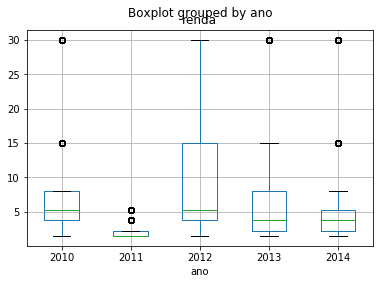

In [23]:
%matplotlib inline
df.boxplot(column='renda', by='ano')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa9d1b9f588>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fa9cf3aaa58>]], dtype=object)

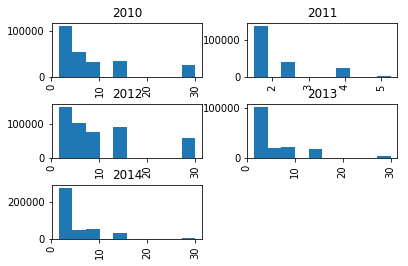

In [26]:
%matplotlib inline
df['renda'].hist(by=df['ano'])